In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd /content/drive/My Drive/Create-a-thon

/content/drive/My Drive/Create-a-thon


In [18]:
import numpy as np
import dlib
import cv2
import os
#import re
#import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance
from google.colab.patches import cv2_imshow 
import glob
from skimage.measure._structural_similarity import structural_similarity as ssim 
import matplotlib.pyplot as plt
%matplotlib inline
from imutils import face_utils

In [19]:
face_detect = dlib.get_frontal_face_detector()

In [ ]:
def face_saver(img,ct,fn):
  dir = os.listdir('database')
  if len(dir)==0:
    os.makedirs('database/criminal-1')
    cv2.imwrite('database/criminal-1/'+str(ct)+'-'+str(fn)+'.jpg',img)
  else:
    li=[]
    f=0
    po=0
    for temp_dir in dir:
      s=0
      avg=0
      length=0
      for temp_image in sorted(glob.glob('database/'+temp_dir+'/*'),reverse=True):
        length+=1

        image=cv2.imread(temp_image,0)
        image1=cv2.resize(image, (224, 224))
        image2=cv2.resize(img, (224, 224))

        s+=ssim(image1, image2)                                                     #comparing images
        if length>20:
          break

      avg_s=s/len(os.listdir('database/'+temp_dir))                                 #average s
      li.append(avg_s)
      if avg_s>=.56:
        print(avg_s)
        po=li.index(max(li))
        path='database/'+dir[po]
        cv2.imwrite(path+'/'+str(ct)+'-'+str(fn)+'.jpg',img)
        f=1
        break
    if (f==0):
      print(max(li))
      n=len(dir)
      path='database/criminal-'+str(n+1)
      os.makedirs(path)
      cv2.imwrite(path+'/'+str(ct)+'-'+str(fn)+'.jpg',img)    



In [ ]:
video_capture = cv2.VideoCapture(r'tbbt.mp4')
ct = 0

while True:

    ret, frame = video_capture.read()
    if not ret:
      break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray, 1)
    ct+=1

    fn=0

    for (i, rect) in enumerate(rects):

        fn+=1

        (x, y, w, h) = face_utils.rect_to_bb(rect)

        #cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        img=gray[y:y+h+10,x:x+w+10]

        img=cv2.resize(img, (224, 224))

        #cv2.imwrite('images2/'+'_'+str(ct)+'*'+str(fn)+'.jpg',img)
        face_saver(img,ct,fn)

        #cv2_imshow(img)
        #print(np.shape(img))
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    '''if(ct>50):
      print('hello')
      break '''   

video_capture.release()
cv2.destroyAllWindows()

In [ ]:
dir = os.listdir('database')
print(len(dir))
n=0
for temp_dir in dir:
  ct=0
  n+=1
  for temp_image in glob.glob('database/'+temp_dir+'/*'):
    ct+=1
  if (ct>20):
    print(n,ct)

51
1 339
4 22
41 47


In [ ]:
dir2=os.listdir('database2')
dir = os.listdir('database')
print(len(dir))
n=0
for temp_dir in dir:
  ct=0
  for temp_image in glob.glob('database/'+temp_dir+'/*'):
    ct+=1
  if (ct>20):
    fn=0
    n+=1
    path='database2/criminal-'+str(n)
    os.makedirs(path)
    for temp_image in glob.glob('database/'+temp_dir+'/*'):
      image1=cv2.imread(temp_image,0)
      fn+=1
      cv2.imwrite(path+'/''img_'+str(fn)+'.jpg',image1)

51


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

ct=0
for image in glob.glob('database2/criminal-2/*'):
  img=cv2.imread(image,0)
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  ct+=1
  for batch in datagen.flow(x, batch_size=1, save_to_dir='database2/criminal-2', save_prefix='img', save_format='jpg'):
      i += 1
      if i > 10:
          break  # otherwise the generator would loop indefinitely

ct=0
for image in glob.glob('database2/criminal-3/*'):
  img=cv2.imread(image,0)
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  ct+=1
  for batch in datagen.flow(x, batch_size=1, save_to_dir='database2/criminal-3', save_prefix='img', save_format='jpg'):
      i += 1
      if i > 5:
          break  # otherwise the generator would loop indefinitely


#test_datagen = ImageDataGenerator(rescale = 1./255)

Using TensorFlow backend.


In [ ]:
dir = os.listdir('database2')
print(len(dir))
n=0
for temp_dir in dir:
  ct=0
  n+=1
  for temp_image in glob.glob('database2/'+temp_dir+'/*'):
    ct+=1
  print(n,ct)

3
1 339
2 259
3 320


#Dont Run Below Cells

#Method 2

In [ ]:
from skimage.measure import compare_ssim,compare_mse,compare_psnr

In [20]:
def compare_images(imageA,title):
  dir = os.listdir('database2')
  for temp_dir in dir:
    f=0
    ct=0
    for temp_image in glob.glob('database2/'+temp_dir+'/*'):
      ct+=1
      image1=cv2.imread(temp_image)
      imageB = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
      imageB=cv2.resize(imageB, (224, 224))
      s = ssim(imageA, imageB)
      if(ct>20):
        break 
      if s>0.65:
        f=1
        print('match with ',temp_dir)
        # setup the figure
        fig = plt.figure(title)
        plt.suptitle(" SSIM: %.2f" % (s))#MSE: %.2f,
        # show first image
        ax = fig.add_subplot(1, 2, 1)
        plt.imshow(imageA, cmap = plt.cm.gray)
        plt.axis("off")
        # show the second image
        ax = fig.add_subplot(1, 2, 2)
        plt.imshow(imageB, cmap = plt.cm.gray)
        plt.axis("off")
        # show the images
        plt.show()
        break
    if (f==1):
      break    

match with  criminal-1


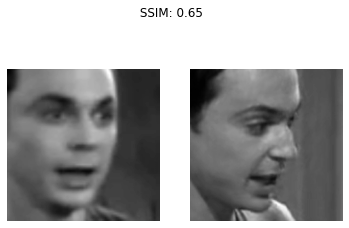

match with  criminal-1


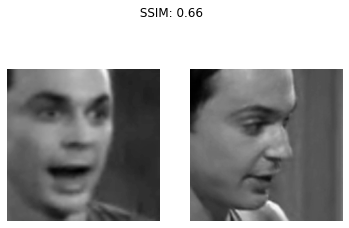

match with  criminal-1


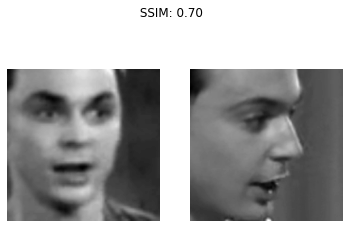

match with  criminal-1


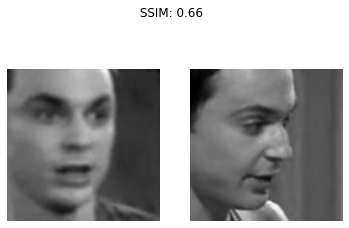

match with  criminal-1


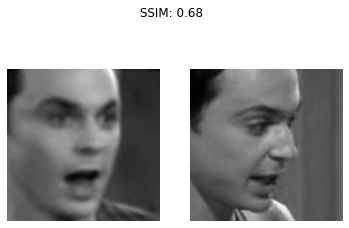

match with  criminal-1


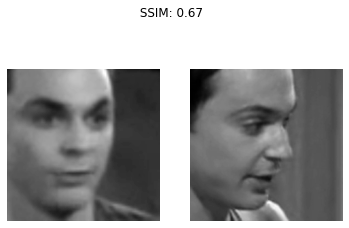

match with  criminal-1


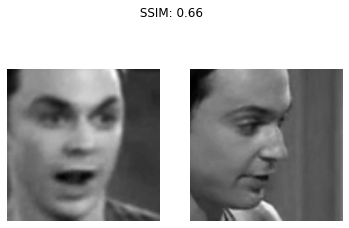

match with  criminal-1


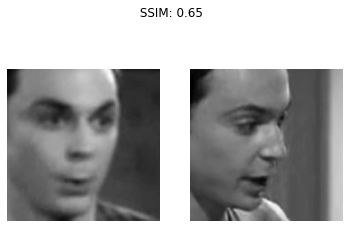

match with  criminal-1


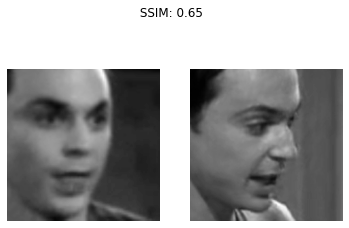

match with  criminal-1


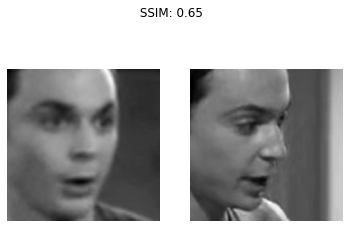

match with  criminal-1


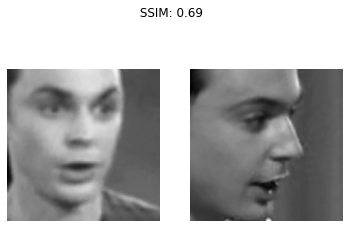

match with  criminal-1


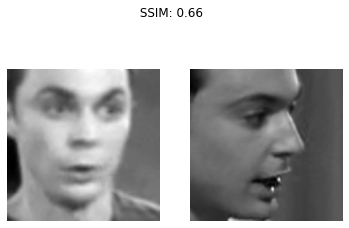

match with  criminal-1


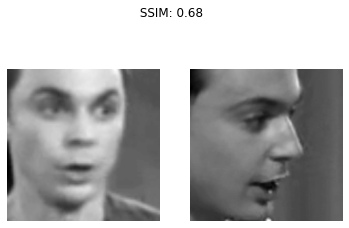

match with  criminal-1


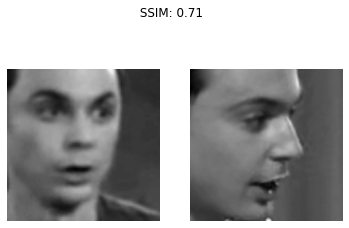

match with  criminal-1


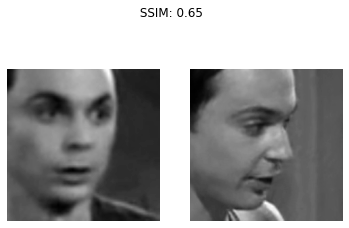

match with  criminal-1


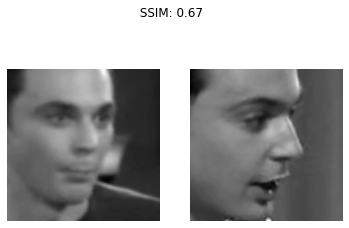

match with  criminal-1


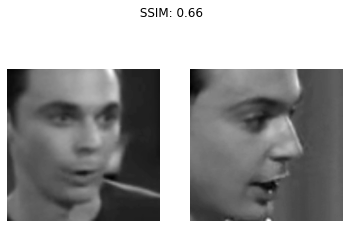

match with  criminal-1


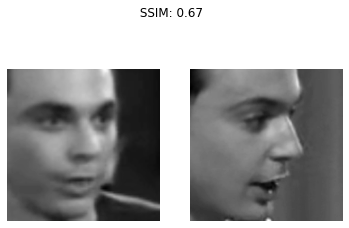

match with  criminal-1


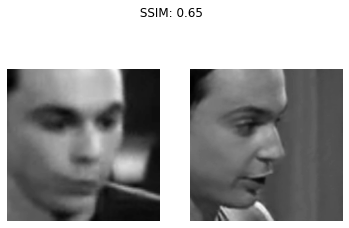

match with  criminal-1


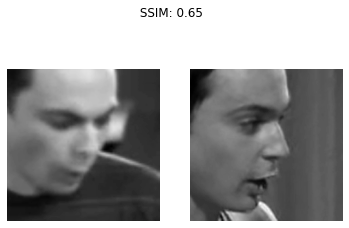

match with  criminal-1


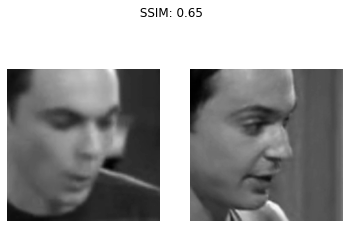

match with  criminal-1


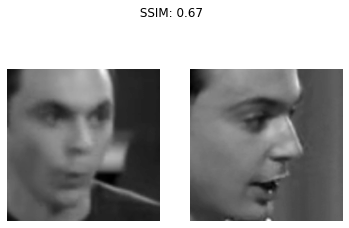

match with  criminal-1


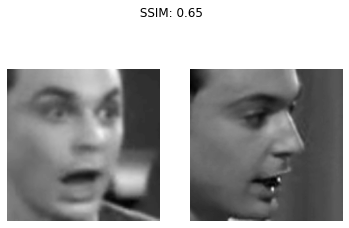

match with  criminal-2


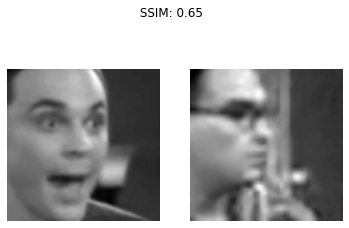

match with  criminal-1


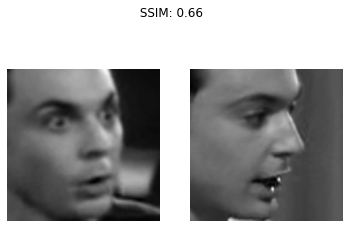

In [21]:
video_capture = cv2.VideoCapture(r'testing video.mp4')
ct = 0

while True:

    ret, frame = video_capture.read()
    if not ret:
      break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray, 1)
    ct+=1
    if(ct%3==0):
      #print(ct)
      fn=0

      for (i, rect) in enumerate(rects):

          fn+=1

          (x, y, w, h) = face_utils.rect_to_bb(rect)

          #cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

          img=gray[y:y+h+10,x:x+w+10]

          img=cv2.resize(img, (224, 224))

          #cv2.imwrite('images2/'+'_'+str(ct)+'*'+str(fn)+'.jpg',img)
          #face_saver(img,ct,fn)
          compare_images(img,"training vs testing")

          #cv2_imshow(img)
          #print(np.shape(img))
          
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break

    '''if(ct>50):
      print('hello')
      break '''   

video_capture.release()
cv2.destroyAllWindows()

In [ ]:
from skimage.measure._structural_similarity import structural_similarity as ssim 
import matplotlib.pyplot as plt
%matplotlib inline

'''def mse(imageA, imageB):

# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
err /= float(imageA.shape[0] * imageA.shape[1])
 
# return the MSE, the lower the error, the more "similar"
# the two images are
return err'''
def compare_images(imageA, imageB, title):

  # compute the mean squared error and structural similarity
  # index for the images
  #m = mse(imageA, imageB)
  s = ssim(imageA, imageB) 
  if s>0.7: 
    print('match')

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle(" SSIM: %.2f" % (s))#MSE: %.2f,
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()
  else: 
    print('not match') 
    pass

In [ ]:
count=0
for image in glob.glob('images2/*'):                      #retriveng images from folder
      image1=cv2.imread(image,0)
      print(count)
      count+=1
      for image0 in glob.glob('images2/*'):
          image2=cv2.imread(image0,0)
          #cv2_imshow(image2)
          #image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
          image1=cv2.resize(image1, (100, 100))
          image2=cv2.resize(image2, (100, 100))
          compare_images(image1, image2, "Original vs. Original")        #comapring images

In [ ]:
#Database
def compare_images2(imageA,title):
  ct=0
  for temp_image in glob.glob('database/*'):
    ct+=1
    image1=cv2.imread(temp_image)
    #imageB = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    imageB=cv2.resize(image1, (224, 224))
    s = ssim(imageA, imageB)
    if s>0.65:
      print('matched')
      # setup the figure
      fig = plt.figure(title)
      plt.suptitle(" SSIM: %.2f" % (s))#MSE: %.2f,
      # show first image
      ax = fig.add_subplot(1, 2, 1)
      plt.imshow(imageA, cmap = plt.cm.gray)
      plt.axis("off")
      # show the second image
      ax = fig.add_subplot(1, 2, 2)
      plt.imshow(imageB, cmap = plt.cm.gray)
      plt.axis("off")
      # show the images
      plt.show()
      break 